<a href="https://colab.research.google.com/github/learneverythingai/Shivam-Modi-Data-Science-Analytics-Course/blob/main/Deep%20Learning%20Course/NLP_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Author and Instructor of this Notebook is **Shivam Modi**.

## LinkedIn: https://www.linkedin.com/in/shivam-modi-datascientist/

<a id="6"></a>
<center><h1><u>Developing Simple Chatbot using Python and Deep Learning</h1></u></center>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


A Chatbot is an application that is used to manage an online chat conversation through text or text to speech format. Most of the chatbots are accessed online through various websites or assistances with a popup.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTAN0l-JaSeHh7F1fwn1ZEAzG4s2FMWHzyrtA&usqp=CAU)

Examples:- E-commerce websites, health, news, etc.



Basic workflow for building chatbot:

1. Import and load the data file
2. Preprocess data
3. Create training and testing data
4. Build the model
5. Predict the response






Note:
---

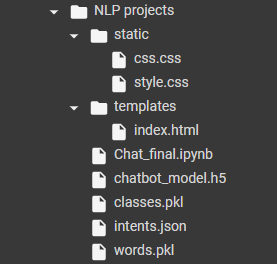


I have provided the files in the links given below:<br>
static:<br>
https://drive.google.com/drive/folders/1o48FdC0MeAQoA_0xANrPpg-pXQ5aCwD6?usp=sharing

templates:<br>
https://drive.google.com/drive/folders/1bVIVMDEXRSFvOAlCRkzIll_S3cqWJwPZ?usp=sharing

intents.json:<br>
https://drive.google.com/file/d/1z4L3Oba6biQgl6gnMc2SUVmzcMUkqcjb/view?usp=sharing


You need to upload the files in the given format only. Rest other files will get create while executing the code.<br>
If you are unable to upload the files these the proper format then the code might give error.

In [ ]:
# import the  libraries
import random
from tensorflow import keras 
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
import numpy as np
import pickle
import json

In [ ]:
#import nltk,WordNetLemmatizer
#download punkt and wordnet 

import nltk
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Now create a folder in drive and add path here to make use of files and intents.

In [ ]:
cd /content/drive/MyDrive/Aiforeverything/Chatbot

/content/drive/MyDrive/Aiforeverything/Chatbot


In [ ]:
!ls

chatbot_model.h5  intents.json				static	  words.pkl
classes.pkl	  learneverythingaiChatbot_final.ipynb	template




Now can download the intent file here:
https://drive.google.com/file/d/1z4L3Oba6biQgl6gnMc2SUVmzcMUkqcjb/view?usp=sharing

In [ ]:
# init file
#create a lists of words, classes and documents.
#open the intent.json file and read that file
words = []
classes = []
documents = []
ignore_words = ["?", "!"]
data_file = open("/content/drive/MyDrive/Aiforeverything/Chatbot/intents.json").read()
intents = json.loads(data_file)

In [ ]:
#iterate over intents
#now iterate over the patterns
# take each word and tokenize it
for intent in intents["intents"]:
    for pattern in intent["patterns"]:
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        documents.append((w, intent["tag"]))
        if intent["tag"] not in classes:
            classes.append(intent["tag"])

In [ ]:
# lemmatizer
#first the lower th words and then iterate throught words and check if it is not present in the ignore words
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))
classes = sorted(list(set(classes)))

In [ ]:
#print the len of documents
print(len(documents), "documents")
print(len(classes), "classes", classes)
print(len(words), "unique lemmatized words", words)

100 documents
55 classes ['AI', 'abbr', 'artificial', 'bend', 'body', 'bot1', 'breathe', 'business', 'chatbot', 'chatterbox', 'clone', 'comp', 'computer', 'control', 'cramped', 'date', 'death', 'do', 'events', 'fav', 'fight', 'goodbye', 'greetings', 'hardware', 'hobby', 'idea', 'imortal', 'lang', 'laugh', 'lie', 'machine', 'malfunction', 'motormouth', 'move', 'name', 'name1', 'need', 'noanswer', 'os', 'program', 'programming', 'ratchet', 'robotics', 'robots', 'robotss', 'sapient', 'sense', 'sentiment', 'shoe', 'sound', 'stupid', 'thanks', 'usage', 'who', 'wt']
126 unique lemmatized words ["'m", "'s", ',', 'a', 'ai', 'all', 'allowed', 'am', 'an', 'are', 'artificial', 'awesome', 'be', 'being', 'bend', 'body', 'bot', 'breathe', 'business', 'bye', 'can', 'chat', 'chatterbox', 'clone', 'coffee', 'computer', 'control', 'cramped', 'data', 'date', 'die', 'do', 'entity', 'event', 'favorite', 'favour', 'fight', 'for', 'good', 'great', 'hardware', 'haroo', 'hello', 'help', 'helpful', 'helping', '



For more about pickle refer :<br>
https://docs.python.org/3/library/pickle.html

In [ ]:
#create pickle dump for words and open with words.pkl and write in wb mode
pickle.dump(words, open("words.pkl", "wb"))
#create pickle dump for classes and open with classes.pkl and write in wb mode
pickle.dump(classes, open("classes.pkl", "wb"))

In [ ]:
# training initializer
# initializing training data
training = []
output_empty = [0] * len(classes)
for doc in documents:
    bag = []
    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])

In [ ]:
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train and test lists. X - patterns, Y - intents
train_x = list(training[:, 0])
train_y = list(training[:, 1])
print("Training data created")

Training data created


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


Now we train our model by  creating a model that has 3 layers.
The first layer is 128 neurons, the second layer is 64 neurons and the third output layer contains number of neurons equal to number of intents to predict output intent with softmax.

In [ ]:
# actual training
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation="softmax"))

After adding all the hidden layers, now we check the summary of our model.

In [ ]:
#check the summary 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               16256     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 55)                3575      
                                                                 
Total params: 28,087
Trainable params: 28,087
Non-trainable params: 0
_________________________________________________________________


The model is compiled with a loss function of categorical_crossentropy and an optimizer of SGD.The metrics for this model are accuracy, which is calculated as the percentage of correct predictions in total number of predictions made.




In [ ]:
# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

In [ ]:
# fitting our model 
hist = model.fit(np.array(train_x), np.array(train_y), epochs=150, batch_size=5, verbose=1)
#save our model in .h5 extension 
model.save("chatbot_model.h5", hist)
print("model created")

Epoch 1/150
20/20 [==============================] - 1s 2ms/step - loss: 4.0051 - accuracy: 0.0000e+00
Epoch 2/150
20/20 [==============================] - 0s 2ms/step - loss: 3.9277 - accuracy: 0.1500
Epoch 3/150
20/20 [==============================] - 0s 2ms/step - loss: 3.8842 - accuracy: 0.0900
Epoch 4/150
20/20 [==============================] - 0s 2ms/step - loss: 3.8100 - accuracy: 0.1300
Epoch 5/150
20/20 [==============================] - 0s 2ms/step - loss: 3.6929 - accuracy: 0.1800
Epoch 6/150
20/20 [==============================] - 0s 2ms/step - loss: 3.6401 - accuracy: 0.1900
Epoch 7/150
20/20 [==============================] - 0s 2ms/step - loss: 3.5439 - accuracy: 0.1600
Epoch 8/150
20/20 [==============================] - 0s 2ms/step - loss: 3.4328 - accuracy: 0.1800
Epoch 9/150
20/20 [==============================] - 0s 2ms/step - loss: 3.3568 - accuracy: 0.2100
Epoch 10/150
20/20 [==============================] - 0s 2ms/step - loss: 3.2868 - accuracy: 0.2000
Epoch

Now our model is trained, So we have to deploy our model with an interface.
So for flask implementation we need IDLEs for implementation. But in this project we are going to implement flask with the help of Google Colab Notebook.

So lets start with Deployment
---

First we will install flask_ngrok for flask implementation in google colab.

In [ ]:
#installing flask_ngrok with pip 
!pip install flask_ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Now we will install and download the ngrok with these commands for installing.

In [ ]:
!curl -s https://ngrok-agent.s3.amazonaws.com/ngrok.asc | sudo tee /etc/apt/trusted.gpg.d/ngrok.asc >/dev/null && echo "deb https://ngrok-agent.s3.amazonaws.com buster main" | sudo tee /etc/apt/sources.list.d/ngrok.list && sudo apt update && sudo apt install ngrok   

deb https://ngrok-agent.s3.amazonaws.com buster main
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [90.7 kB]
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:11 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,533 kB]
Get:12 

After importing the libraries, We need to add ngrok token here.

![](https://help.polymer3d.app/assets/ngrok-token.png)

In [ ]:
#!ngrok add token here
#!ngrok authtoken 23mMEZeu7mTNdBDg1w3DctEhXpl_5MeopxnhcRvxuaxJGLEk2
!ngrok authtoken 2DLhfpaJspqieAYJCdEEIJIKSft_4PuqHs532NU9A323LHzWD

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
# libraries
#import flask 
from flask import *
#import run_with_ngrok from flask_ngrok 
from flask_ngrok import run_with_ngrok
#import radom
import random
#import numpy
import numpy as np
#import pickle
import pickle
#import json
import json
#import load_model from tensorflow
from tensorflow.keras.models import load_model
#import nltk
import nltk
#import WordNetLemmatizer from nltk.stem
from nltk.stem import WordNetLemmatizer
#create a object of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
!pip install pyopenssl

Exception in thread _colab_inspector_thread:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/google/colab/_debugpy.py", line 64, in inspector_thread
    _variable_inspector.run(shell, time)
  File "/usr/local/lib/python3.7/dist-packages/google/colab/_variable_inspector.py", line 27, in run
    globals().clear()
TypeError: 'module' object is not callable



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.7 MB/s 
     |████████████████████████████████| 4.1 MB 18.2 MB/s 


In [ ]:
#create a flask app
app = Flask(__name__)
#run_with_ngrok(app)
run_with_ngrok(app) 

# chat initialization
#load model chatbot_model.h5
model = load_model("chatbot_model.h5")
#open and reading the intents.json
intents = json.loads(open("/content/drive/MyDrive/Aiforeverything/Chatbot/intents.json").read())
#pickle load for words and open with words.pkl and rb mode
words = pickle.load(open("words.pkl", "rb"))
#pickle load for classes and open with classes.pkl and rb mode
classes = pickle.load(open("classes.pkl", "rb"))

#app.route("/")
@app.route("/")
#def a home function to render index page
def home():
    #return render template index.html
    return render_template("/content/drive/MyDrive/Aiforeverything/Chatbot/template/index.html")

#@app.route("/get",methods=["POST"])
@app.route("/get", methods=["POST"])
#define a chatbot response
def chatbot_response():
    #requesting a msg 
    #msg = request.form["msg"]
    msg = request.form["msg"]
    #if user give his/her name so to store that name in a variable
    #if msg.startswith('my name is'):
    if msg.startswith('my name is'):
        #now name =msg[11:]
        name = msg[11:]
        #use predict class and pass the msg and model parameter[#ints = predict_class(msg, model)]
        ints = predict_class(msg, model)
        #use getResponse and pass the ints and intents parameters[res1 = getResponse(ints, intents)]
        res1 = getResponse(ints, intents)
        #replace with name[res =res1.replace("{n}",name)]
        res =res1.replace("{n}",name)
    #if user type hi my name is so length will be increased so +3
    elif msg.startswith('hi my name is'):
        #now name =msg[14:]
        name = msg[14:]
        #use predict class and pass the msg and model parameter[#ints = predict_class(msg, model)]
        ints = predict_class(msg, model)
        #use getResponse and pass the ints and intents parameters[res1 = getResponse(ints, intents)]
        res1 = getResponse(ints, intents)
        #replace with name[res =res1.replace("{n}",name)]
        res =res1.replace("{n}",name)
    #if user does not type his/her name 
    #esle
    else:
        #use predict class and pass the msg and model parameter[#ints = predict_class(msg, model)] 
        ints = predict_class(msg, model)
        #use getResponse and pass the ints and intents parameters[res1 = getResponse(ints, intents)]
        res = getResponse(ints, intents)
    #return the res
    return res


# chat functionalities
#define a function to clean or preprocess the sentences
def clean_up_sentence(sentence):
    #tokenizing the sentences
    sentence_words = nltk.word_tokenize(sentence)
    #lemmatizing the sentences
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    #return preprocessed words or sentences
    return sentence_words


# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence
#defining a function with sentences and words as parameter
def bow(sentence, words, show_details=True):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words - matrix of N words, vocabulary matrix[bag = [0] * len(words)]
    bag = [0] * len(words)
    #iterate for sentences[for s in sentence_words:]
    for s in sentence_words:
        #now enumerate over words
        for i, w in enumerate(words):
          #if w=s assign 1 if current word is in the vocabulary position
            if w == s:
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                #if show_details
                if show_details:
                    #print found baf i w
                    print("found in bag: %s" % w)
    #return numpy array with bag
    return np.array(bag)

#define function of predict class with sentence and model as parameter
def predict_class(sentence, model):
    # filter out predictions below a threshold
    #creating bow of sentence, words [p = bow(sentence, words, show_details=False)]
    p = bow(sentence, words, show_details=False)
    #we will predict with numpy array taking 0th postion[res = model.predict(np.array([p]))[0]] 
    res = model.predict(np.array([p]))[0]
    #intiailize the threshold value=0.25
    ERROR_THRESHOLD = 0.25
    #results = [[i, r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]
    results = [[i, r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    #creating a list
    return_list = []
    #iterating in results
    for r in results:
        #appending intent and probabiltiy[ return_list.append({"intent": classes[r[0]], "probability": str(r[1])})]
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    #return list
    return return_list


#defing a getResponse with ints and intent_json as parameter
def getResponse(ints, intents_json):
    #tag=ints[0][intent]
    tag = ints[0]["intent"]
    #storing all intents in list of intents[list_of_intents = intents_json["intents"]]
    list_of_intents = intents_json["intents"]
    #iterate over lists of intents
    for i in list_of_intents:
        # if tag == tag then print respones
        if i["tag"] == tag:
            result = random.choice(i["responses"])
            break
    #return result
    return result

#if __name__ == "__main__":
if __name__ == "__main__":
    #run the app 
    app.run()
    app.debug = True



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://81be-35-199-55-191.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
